## Basic prediction without parameters

* data vector: version04

In [5]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [6]:
vec = pd.read_csv('learning_vectors/v04/version04-shotstransfermarkt_noNaNs.csv', sep=',')
print(vec.shape)
vec.head()


(6069, 30)


,Match_id,League_id,Season,Stage,Date,H_team,A_team,Result,H_age,A_age,...,H_Form05,A_Form05,H_MeanShots03,A_MeanShots03,H_MeanShots05,A_MeanShots05,H_MeanShotsOnTarget03,A_MeanShotsOnTarget03,H_Better_MeanShotsOnTarget05,A_Better_MeanShotsOnTarget05
0,1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,21.3,24.6,...,7,1,19.000000,11.333333,15.8,10.2,10.666667,5.333333,9.4,4.2
1,1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,24.9,23.9,...,3,12,5.333333,16.333333,7.0,15.0,2.333333,8.000000,3.8,8.0
2,1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,24.3,25.7,...,5,5,10.666667,13.000000,11.6,14.6,5.666667,6.333333,7.0,8.0
3,1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,24.4,26.4,...,10,4,10.000000,11.666667,11.4,11.8,5.333333,7.000000,6.0,6.4
4,1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,22.3,22.5,...,11,7,10.000000,8.333333,11.2,9.2,6.666667,5.000000,6.2,5.4


Alg/res.mean/res.std
LR: 0.533038 (0.008282)
LDA: 0.532543 (0.011752)
KNN: 0.476521 (0.003856)
CART: 0.431207 (0.003565)
NB: 0.487229 (0.010466)
SVM: 0.472073 (0.005654)


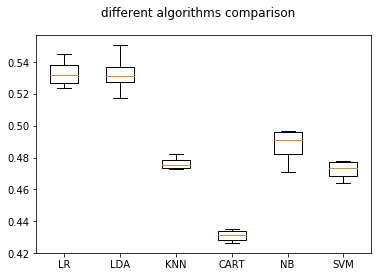

In [7]:
pred = ['H_age', 'A_age', 'H_TMV', 'A_TMV', 'H_Form03', 'A_Form03', 'H_Form05', 'A_Form05',
        'H_MeanShots03', 'A_MeanShots03', 'H_MeanShots05', 'A_MeanShots05', 'H_MeanShotsOnTarget03',
        'A_MeanShotsOnTarget03',
        'H_Better_MeanShotsOnTarget05', 'A_Better_MeanShotsOnTarget05']

X = vec[pred]
y = vec['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
